In [1]:
import tensorflow as tf
import keras

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from tensorflow.keras import datasets, layers,models

In [4]:
train_datagen=ImageDataGenerator(rescale=1/255)

In [12]:
training_set=train_datagen.flow_from_directory('/content/dataset',target_size=(64,64),batch_size=32,class_mode='binary')

Found 1000 images belonging to 2 classes.


### Method 1: Direct Upload using `google.colab.files.upload()`

In [7]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving archive.zip to archive.zip
User uploaded file "archive.zip" with length 22933881 bytes


After running the cell above, a button will appear. Click 'Choose Files' to select files from your computer. Once uploaded, you can access them by their filename, for example, `/content/your_file_name.csv`.

In [10]:
!unzip /content/archive.zip -d /content/dataset

Archive:  /content/archive.zip
  inflating: /content/dataset/cats_set/cat.4001.jpg  
  inflating: /content/dataset/cats_set/cat.4002.jpg  
  inflating: /content/dataset/cats_set/cat.4003.jpg  
  inflating: /content/dataset/cats_set/cat.4004.jpg  
  inflating: /content/dataset/cats_set/cat.4005.jpg  
  inflating: /content/dataset/cats_set/cat.4006.jpg  
  inflating: /content/dataset/cats_set/cat.4007.jpg  
  inflating: /content/dataset/cats_set/cat.4008.jpg  
  inflating: /content/dataset/cats_set/cat.4009.jpg  
  inflating: /content/dataset/cats_set/cat.4010.jpg  
  inflating: /content/dataset/cats_set/cat.4011.jpg  
  inflating: /content/dataset/cats_set/cat.4012.jpg  
  inflating: /content/dataset/cats_set/cat.4013.jpg  
  inflating: /content/dataset/cats_set/cat.4014.jpg  
  inflating: /content/dataset/cats_set/cat.4015.jpg  
  inflating: /content/dataset/cats_set/cat.4016.jpg  
  inflating: /content/dataset/cats_set/cat.4017.jpg  
  inflating: /content/dataset/cats_set/cat.4018.jpg

In [11]:
!ls /content/dataset

cats_set  dogs_set


Please run the cell above. The output will show you the exact folders and files that were extracted into `/content/dataset`. Once we see that, we can determine the correct path for your `training_set`.

This command will extract the contents of `archive.zip` into a new directory named `dataset` within the `/content/` folder. After this, you should be able to access your images using paths like `/content/dataset/your_image_folder`.

In [13]:
training_set.class_indices

{'cats_set': 0, 'dogs_set': 1}

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2   # 80% train, 20% validation
)

train_data = datagen.flow_from_directory(
    "dataset/",
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    subset="training"
)

val_data = datagen.flow_from_directory(
    "dataset/",
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    subset="validation"
)


Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [15]:
print(train_data.class_indices)

{'cats_set': 0, 'dogs_set': 1}


In [16]:
train_data.image_shape

(224, 224, 3)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [18]:
model=Sequential([
    Conv2D(32,(3,3),
    activation='relu',
    input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64,(3,3),
    activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128,(3,3),
    activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [21]:
history=model.fit(train_data,epochs=10,validation_data=val_data)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 220ms/step - accuracy: 0.4845 - loss: 0.9612 - val_accuracy: 0.5000 - val_loss: 0.6939
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.5256 - loss: 0.6914 - val_accuracy: 0.6100 - val_loss: 0.6645
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.5678 - loss: 0.6641 - val_accuracy: 0.6150 - val_loss: 0.6628
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.6329 - loss: 0.6461 - val_accuracy: 0.6000 - val_loss: 0.6547
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.7023 - loss: 0.5962 - val_accuracy: 0.6100 - val_loss: 0.6252
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.7221 - loss: 0.5518 - val_accuracy: 0.6600 - val_loss: 0.6075
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.7992 - loss: 0.4705 - val_accuracy: 0.6300 - val_loss: 0.6279
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.8298 - loss: 0.3836 - val_accuracy: 0.6000 - val_loss

In [22]:
loss,acc=model.evaluate(val_data)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.5948 - loss: 0.9984


In [23]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

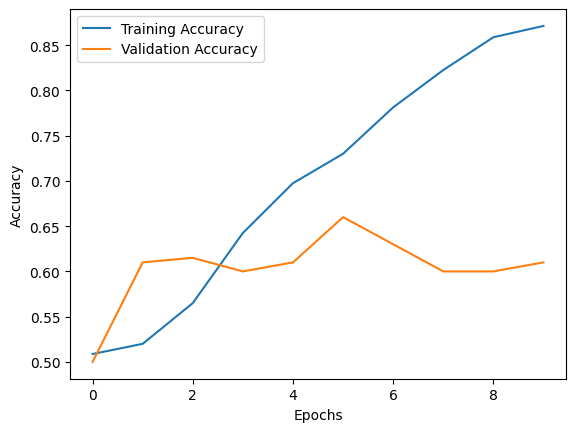

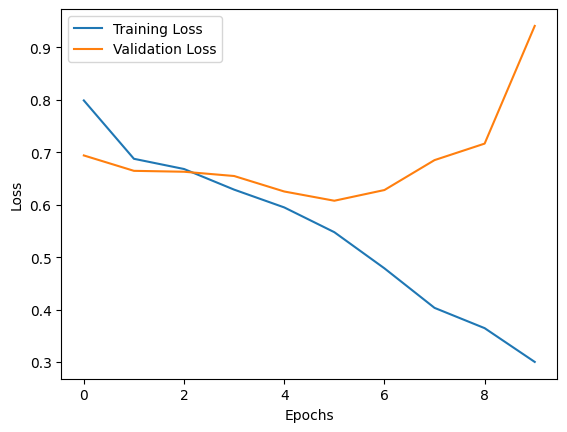

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [27]:
from PIL import Image

In [29]:
from numpy import test

import numpy as np
from keras.preprocessing import image
test_image=Image.open('/content/dataset/cats_set/cat.4001.jpg')
test_image=test_image.resize((224,224))
test_image=np.array(test_image)
test_image=np.expand_dims(test_image,axis=0)
prediction=model.predict(test_image)


if prediction[0][0]>0.5:
  print('Dog')
else:
  print('Cat')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 786ms/step
Cat
